In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print(f"Keys of iris_dataset: \n{iris_dataset.keys()}")

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print(iris_dataset['DESCR'][:193])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att


In [4]:
print(f"Target names: {iris_dataset['target_names']}")

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print(f"Feature names: \n{iris_dataset['feature_names']}")

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(f"Type of data: {type(iris_dataset['data'])}")

Type of data: <class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


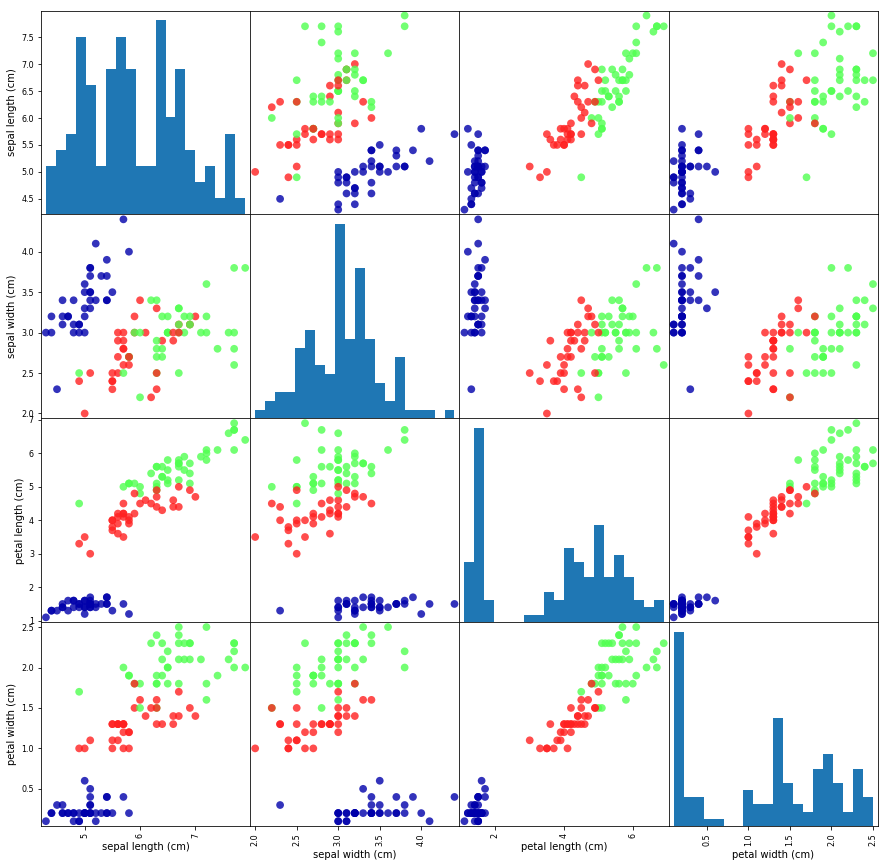

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# Create DataFrame from X_train's data
# Label a column name with using `iris_dataset.feature_names`
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# Create a scatter matrix from DataFrame and color it according to y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [13]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
# Create a model from training-set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
import numpy as np

# Predict a new sample
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 4)


In [16]:
prediction = knn.predict(X_new)
print(f"Prediction: {prediction}")
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Prediction: [0]
Predicted target name: ['setosa']


In [17]:
# Evaluate the model from test-set

y_pred = knn.predict(X_test)
print(f"Test set predictions:\n{y_pred}")

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [18]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [19]:
# more useful method `score` for evaluation
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
